# 4장 넘파이 2편

## 주요 내용

- 어레이 인덱싱, 슬라이싱
- 전치 어레이

## 기본 설정

`numpy` 모듈과 시각화 도구 모듈인 `matplotlib.pyplot`에 대한 기본 설정을 지정한다.

In [1]:
# 넘파이
import numpy as np
# 램덤 시드
np.random.seed(12345)
# 어레이 사용되는 부동소수점들의 정확도 지정
np.set_printoptions(precision=4, suppress=True)

# 파이플롯
import matplotlib.pyplot as plt
# 도표 크기 지정
plt.rc('figure', figsize=(10, 6))

## 4.1 넘파이 다차원 어레이 객체(`ndarray`)

### 4.1.4 인덱스, 인덱싱, 슬라이싱 (p. 144)

리스트의 인덱스, 인덱싱, 슬라이싱 개념을 넘파이 어레이에 확장시킨다.
리스트의 경우보다 보다 다양한 기능을 제공하며 데이터 분석에서 매우 중요한 역할을 수행한다.

#### 1차원 어레이 인덱싱, 슬라이싱

1차원 어레이의 경우 리스트의 경우와 거의 동일하게 작동한다.

In [2]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

* 인덱싱: 리스트의 경우와 동일

In [3]:
arr[5]

5

* 슬라이싱: 구간 확인 기능은 리스트의 경우와 동일

In [4]:
arr[5:8]

array([5, 6, 7])

* 슬라이싱 활용: 구간을 특정 값으로 대체하는 기능

In [5]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

__주의사항:__ 위 기능은 리스트에서는 제공되지 않는다.

In [6]:
aList = list(arr)
aList

[0, 1, 2, 3, 4, 12, 12, 12, 8, 9]

In [7]:
aList[5:8] = 12
aList

TypeError: can only assign an iterable

아래와 같이 리스트를 값으로 지정하면 작동한다.

In [ ]:
aList[5:8] = [12, 12, 12]
aList

#### 뷰(view) 이해

넘파이 어레이에 대해 슬라이싱을 실행하면 지정된 구간에 해당하는 어레이를 새로 생성하는 게 아니라
지정된 구간의 정보를 이용만 한다. 
이렇게 작동하는 기능이 __뷰__(view)이다. 
즉, 어레이를 새로 생성하지 않고 기존 어레이를 적절하게 활용한다.

__참고:__ 넘파이 어레이와 관련된 많은 기능이 뷰 기능을 이용한다. 아래에서 소개하는 전치 어레이를 
구하는 과정도 뷰를 이용한다.

In [8]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [9]:
arr_slice[1] = 3450
arr

array([   0,    1,    2,    3,    4,   12, 3450,   12,    8,    9])

어레이 전체 항목을 특정 값으로 한꺼번에 바꾸려면 `[:]`로 슬라이싱 한다.

In [10]:
arr_slice[:] = 64
arr_slice

array([64, 64, 64])

In [11]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

#### `copy()` 메서드

원본을 그대로 유지하고자 한다면 어레이를 새로 생성해서 사용해야 하며, 이를 위해 `copy()` 메서드를 활용한다.

In [12]:
arr_slice2 = arr[5:8].copy()
arr_slice2

array([64, 64, 64])

`arr_slice2`를 변경해도 `arr`은 영향받지 않는다.

In [13]:
arr_slice2[1] = 12
arr_slice2

array([64, 12, 64])

In [14]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

#### 2차원 어레이 인덱싱

2차원 이상의 다차원 어레이는 보다 다양한 인덱싱, 슬라이싱 기능을 제공한다. 

In [15]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

리스트의 인덱싱을 그대로 사용할 수 있다.

* 0번 인덱스 항목: 길이가 3인 1차원 어레이

In [16]:
arr2d[0]

array([1, 2, 3])

* 0번 인덱스의 2번 인덱스 항목: 리스트 인덱싱 방식
    - 0번 인덱스의 항목이 리스트이며, 그 리스트의 2번 인덱스 항목 확인

In [17]:
arr2d[0][2]

3

위 인덱싱을 2차원 어레이 인덱싱 방식으로 아래와 같이 쉽게 할 수 있다.

In [18]:
arr2d[0, 2]

3

<img src="https://github.com/codingalzi/python-data-analysis/blob/master/notebooks/images/numpy146.png?raw=true" style="width:300px;">

#### 3차원 어레이 인덱싱

`arr3d`는 (2, 2, 3) 모양의 3차원 어레이다.

In [19]:
arr3d = np.array([[[1, 2, 3], 
                   [4, 5, 6]], 
                  
                  [[7, 8, 9], 
                   [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [20]:
arr3d.shape

(2, 2, 3)

모양이 (2, 2, 3)인 3차원 어레이의 0번 인덱스 항목은 (2, 3) 크기의 2차원 어레이다.

In [21]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

0번 인덱스 항목인 2차원 어레이의 항목을 일정한 값으로 바꾸기 위해 인덱싱을 활용할 수 있다.

In [22]:
# 기존 항목 기억해 두기
old_values = arr3d[0].copy()

In [23]:
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [24]:
# arr3d를 계속 사용하기 위해 원래 값으로 되돌린다.

arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

모양이 (2, 2, 3)인 3차원 행렬의 1번 행, 0번 열의 항목은 길이가 3인 1차원 어레이다.

In [25]:
arr3d[1, 0]

array([7, 8, 9])

실제로 아래 처럼 1번행과 1번 행의 0번 열의 값을 확인하면 동일한 값이 나온다.

In [26]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [27]:
x[0]

array([7, 8, 9])

모양이 (2, 2, 3)인 3차원 행렬의 1번 행, 0번 열, 2번 인덱스의 항목은 길이가 정수 9이다.

In [28]:
arr3d[1, 0, 2]

9

실제로 아래 처럼 1번행과 1번 행, 0번 열, 2번 인덱스의 값을 확인하면 동일한 값이 나온다.

In [29]:
arr3d[1][0][2]

9

#### 2차원 어레이 슬라이싱 (p. 148)

In [30]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

리스트 슬라이싱 방식을 동일하게 적용할 수 있다.

* 1번 인덱스 이전까지

In [31]:
arr2d[:1]

array([[1, 2, 3]])

* 2번 인덱스 이전까지

In [32]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

* 전체 항목 슬라이싱

In [33]:
arr2d[:3]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

행과 열을 함께 슬라이싱하려면 행과, 열에 대한 슬라이싱을 동시에 지정한다.

* 행 기준: 2번 행 이전까지
* 열 기준: 1번 열부터 끝까지

In [34]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

<img src="https://github.com/codingalzi/python-data-analysis/blob/master/notebooks/images/numpy149-1.png?raw=true" style="width:350px;">

인덱싱과 슬라이싱이 행과 열 각각에 대해 독립적으로 사용될 수 있다.

* 행 기준: 1번 행 인덱싱
* 열 기준: 2번 열 이전까지

In [35]:
arr2d[1, :2]

array([4, 5])

<img src="https://github.com/codingalzi/python-data-analysis/blob/master/notebooks/images/numpy149-4.png?raw=true" style="width:350px;">

__주의사항:__ 인덱싱을 사용하는 만큼 결과 어레이의 차원이 기존 어레이의 차원보다 1씩 줄어든다.

In [36]:
arr2d[1, :2].shape

(2,)

동일한 항목을 사용하지만 인덱싱을 사용할 때와 아닐 때의 결과는 다른 모양의 어레이가 된다.

In [37]:
arr2d[1:2, :2]

array([[4, 5]])

모양은 사용되는 슬라이싱의 구간에 의존한다.

* 행 기준: 1행 하나만 사용
* 열 기준: 0행, 2행 두 개 사용.

따라서 결과는 (1, 2) 모양의 어레이다.

In [38]:
arr2d[1:2, :2].shape

(1, 2)

* 행 기준: 행 전체
* 열 기준: 2번 열 이전까지

In [39]:
arr2d[:, :2]

array([[1, 2],
       [4, 5],
       [7, 8]])

<img src="https://github.com/codingalzi/python-data-analysis/blob/master/notebooks/images/numpy149-3.png?raw=true" style="width:350px;">

In [40]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [41]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### 연습

아래 그림 모양의 2차원 어레이를 생성한다.

__참고:__ 아래에서는 길이가 36인 1차원 어레이를 (6, 6) 모양의 2차원 어레이로 항목을 재배열하기 위해
`reshape()` 함수를 사용한다.
`reshape()` 함수에 대한 자세한 설명은 뒤에서 이루어진다.

In [42]:
arr = np.arange(36).reshape((6, 6))
arr

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

<img src="https://github.com/codingalzi/python-data-analysis/blob/master/notebooks/images/numpy-2darray.png?raw=true" style="width:250px;">

<그림 출처: [geeksforgeeks](https://www.geeksforgeeks.org/numpy-indexing/)>

위 그림에 색깔별로 표시된 어레이를 슬라이싱을 이용하여 구하라.

* 주황색 1차원 어레이

In [43]:
arr[0, 3:5]

array([3, 4])

* 빨강색 2차원 어레이
    - 주의: 위아래 모양은 2차원 어레이로 간주한다.

In [44]:
arr[:, 2:3]

array([[ 2],
       [ 8],
       [14],
       [20],
       [26],
       [32]])

만약에 열에 대해 슬라이싱 대신 인덱싱을 사용하면 1차원 어레이를 얻는다.

In [45]:
arr[:, 2]

array([ 2,  8, 14, 20, 26, 32])

#### 스텝

리스트 슬라이싱의 경우처럼 스텝도 사용할 수 있다.

* 초록색 2차원 어레이
    - 초록색 칸의 항목들을 슬라이싱 하려면 두 칸씩 건너뛰는 __스텝__을 사용한 슬라이싱을 이용해야 한다.

In [46]:
arr[2:5:2, 0::2]

array([[12, 14, 16],
       [24, 26, 28]])

#### 3차원 어레이 인덱싱/슬라이싱

기본적으로 2차원 어레이 슬라이싱 기능과 동일하게 작동한다.
여기서는 칼라 이미지 데이터를 3차원 어레이로, 흑백 이미지를 2차원 어레이로 다루면서
인덱싱과 슬라이싱을 이용하여 이미지를 조작하는 간단한 방법을 설명한다.

먼저 너구리 얼굴 이미지를 가져온다.

In [47]:
import scipy.misc
face = scipy.misc.face()

`face`는 너구리 얼굴 이미지를 3차원 어레이로 불러온다.

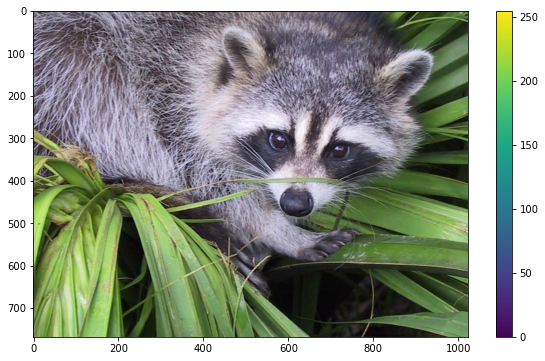

In [48]:
plt.imshow(face)
plt.colorbar()
plt.show()

`face`는 아래 모양의 3차원 어레이가 들어 있다.

In [49]:
face.shape

(768, 1024, 3)

어레이에 사용된 값은 각 픽셀의 RGB 정보는 0부터 255사이의 값이다.

In [50]:
face.max()

255

픽셀 정보를 0과 1사이의 부동소수점으로 변경해도 된다.

In [51]:
face = face/255

흑백 이미지는 보통 하나의 RGB 정보만 가져오는 것으로 구할 수 있다.

In [52]:
face_gray = face[:,:,0]

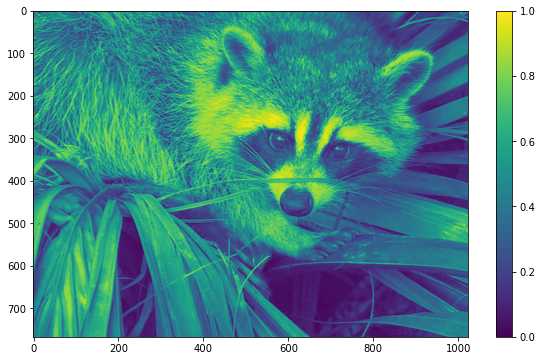

In [53]:
plt.imshow(face_gray)
plt.colorbar()
plt.show()

사진 크기 조절은 픽셀 수를 조절하는 방식으로 이루어진다. 
가장 단순한 방식은 행과 열에서 각각 2개씩 건너뛰며 픽셀을 선택하는 것이다.
일부 데이터가 상실되지만 눈으로 보일 정도로 영향을 받지는 않는다.

아래 코드는 행과 열에 대해 슬라이싱 적용하였다. 각 슬라이딩은 스텝 2를 사용한다.

In [54]:
face_half_simple = face[::2, ::2,:]

In [55]:
face_half_simple.shape

(384, 512, 3)

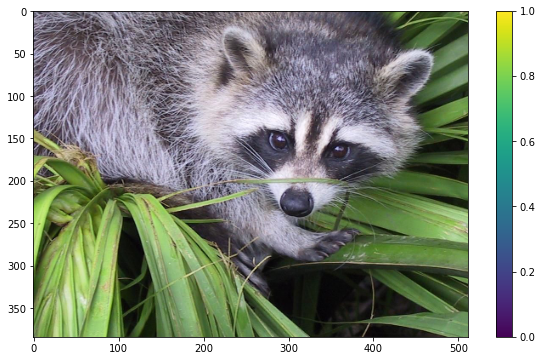

In [56]:
plt.imshow(face_half_simple)
plt.colorbar()
plt.show()

가장 일반적으로 사용되는 방법은 __보간법__(interpolation)이다. 
이미지 크기 변경에 사용되는 다양한 보간법 기법이 있지만 여기서는 두 픽셀 사이의 평균값을 취하는 방식을 이용한다.
보간법의 다양한 방식에 대한 설명은 [OpenCV 보간법](https://m.blog.naver.com/vps32/221762092250)을 참조한다.

In [57]:
face_half_interpolation = (face[::2, ::2, :] + face[1::2, 1::2, :])/2

In [58]:
face_half_interpolation.shape

(384, 512, 3)

In [59]:
plt.imshow(face_half)
plt.colorbar()
plt.show()

NameError: name 'face_half' is not defined

4분의 1 크기의 두 이미지 데이터가 조금 다르기는 하지만 이미지 상으로 차이점을 발견하기 어렵다.

In [60]:
face_half_interpolation[:2]

array([[[0.4529, 0.4216, 0.4941],
        [0.5686, 0.5353, 0.6176],
        [0.5941, 0.5608, 0.6471],
        ...,
        [0.4784, 0.5118, 0.3078],
        [0.4588, 0.4863, 0.2784],
        [0.5431, 0.5667, 0.3549]],

       [[0.3333, 0.3118, 0.3804],
        [0.4608, 0.4373, 0.5118],
        [0.4961, 0.4706, 0.5549],
        ...,
        [0.4216, 0.4667, 0.2588],
        [0.4314, 0.4725, 0.2588],
        [0.5059, 0.5451, 0.3275]]])

In [61]:
face_half_simple[:2]

array([[[0.4745, 0.4392, 0.5137],
        [0.6   , 0.5647, 0.6471],
        [0.6078, 0.5725, 0.6549],
        ...,
        [0.5294, 0.5608, 0.3608],
        [0.4549, 0.4824, 0.2784],
        [0.5137, 0.5333, 0.3216]],

       [[0.2863, 0.2588, 0.3294],
        [0.451 , 0.4235, 0.4941],
        [0.498 , 0.4667, 0.549 ],
        ...,
        [0.4235, 0.4627, 0.2588],
        [0.4078, 0.4471, 0.2392],
        [0.5216, 0.5569, 0.3412]]])

__참고:__ 4차원 이상의 어레이에 대해서는 기본적으로 2, 3차원 어레이 대상과 동일하게 작동한다.
하지만 시각화가 기본적으로 불가능하고, 사람이 직접 4차원 이상의 슬라이싱을 조작는 것도 매우 어렵다.
따라서 여기서는 2, 3차원 어레이 슬라이싱의 기본 아이디어만 이해했다면 그것으로 충분하다는 점만 언급한다.

### 4.1.5 부울 인덱싱 (p. 150)

부울 인덱싱은 앞서 설명한 인덱싱/슬라이싱 기법이 처리하지 못하는
인덱싱/슬라이싱을 지원한다.

설명을 위해 아래 두 개의 어레이를 이용한다.

* 중복된 이름을 포함하는 1차원 어레이. 길이는 7.

In [62]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

* (7, 4) 모양의 2차원 어레이 무작위 생성
    - `randn()` 함수는 표준 정규 분포를 이용하여 임의의 부동소수점으로 이루어진 어레이 생성.

In [63]:
data = np.random.randn(7, 4)
data

array([[-0.2047,  0.4789, -0.5194, -0.5557],
       [ 1.9658,  1.3934,  0.0929,  0.2817],
       [ 0.769 ,  1.2464,  1.0072, -1.2962],
       [ 0.275 ,  0.2289,  1.3529,  0.8864],
       [-2.0016, -0.3718,  1.669 , -0.4386],
       [-0.5397,  0.477 ,  3.2489, -1.0212],
       [-0.5771,  0.1241,  0.3026,  0.5238]])

`names`에 포함된 이름이 Bob인지 여부를 확인하면 부울 값으로 이루어진 길이가 7인 어레이가 생성된다.
즉, 항목별 비교 연산이 이루어진다.

In [64]:
name_Bob = names == 'Bob'
name_Bob

array([ True, False, False,  True, False, False, False])

이제부터 `name_Bob` 어레이에서 
`True`가 위치한 인덱스를 이용하여 `data` 2차원 어레이를 대상으로 부울 인덱싱이 
작동하는 방법을 설명한다.

먼저, `data` 의 행의 길이가 7임에 주목하라.
이제 `name_Bob`에서 `True`가 위치한 인덱스에 해당하는 항목만 `data`에서 슬라이싱하려면
다음과 같이 부울 인덱싱을 사용한다.
결과는 `data`에서 0번행과 3번행만 가져온다.
이유는 `name_Bob`에서 0번, 3번 인덱스의 항목만 `True`이기 때문이다.

In [65]:
data[name_Bob]

array([[-0.2047,  0.4789, -0.5194, -0.5557],
       [ 0.275 ,  0.2289,  1.3529,  0.8864]])

부울 인덱싱과 일반 인덱싱, 슬라이싱을 혼합할 수 있다.

* 행 기준: Bob이 포함된 행의 인덱스를 갖는 행
* 열 기준: 2번 열 이후 전체

In [66]:
data[name_Bob, 2:]

array([[-0.5194, -0.5557],
       [ 1.3529,  0.8864]])

* 행 기준: Bob이 포함된 행의 인덱스를 갖는 행
* 열 기준: 3번 열

In [67]:
data[name_Bob, 3]

array([-0.5557,  0.8864])

#### 부울 인덱싱과 부울 연산

부울 연산자(`~`, `&`, `|`)를 부울 인덱싱에 직접 활용할 수 있다.
예를 들어, 이름이 Bob 아닌 이름이 위치한 인덱스에 해당하는 행만 가져오려면
`==` 대신에 `~=`를 이용하거나 `==`와 `~` 연산자를 함께 이용한다.

In [68]:
data[names != 'Bob']

array([[ 1.9658,  1.3934,  0.0929,  0.2817],
       [ 0.769 ,  1.2464,  1.0072, -1.2962],
       [-2.0016, -0.3718,  1.669 , -0.4386],
       [-0.5397,  0.477 ,  3.2489, -1.0212],
       [-0.5771,  0.1241,  0.3026,  0.5238]])

In [69]:
data[~name_Bob]

array([[ 1.9658,  1.3934,  0.0929,  0.2817],
       [ 0.769 ,  1.2464,  1.0072, -1.2962],
       [-2.0016, -0.3718,  1.669 , -0.4386],
       [-0.5397,  0.477 ,  3.2489, -1.0212],
       [-0.5771,  0.1241,  0.3026,  0.5238]])

다음은 Bob 또는 Will 이 위치한 인덱스에 해당하는 행만 가져온다.

In [70]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [71]:
data[mask]

array([[-0.2047,  0.4789, -0.5194, -0.5557],
       [ 0.769 ,  1.2464,  1.0072, -1.2962],
       [ 0.275 ,  0.2289,  1.3529,  0.8864],
       [-2.0016, -0.3718,  1.669 , -0.4386]])

__참고:__ 부울 인덱싱에 사용되는 부울 어레이를 __마스크__(mask)라고 부르기도 한다.
따라서 mask 변수가 종종 부울 인덱싱에 변수로 사용된다.

부울 인덱싱으로 동일한 모양의 부울 어레이를 사용할 수 있다.
부울 인덱싱으로 사용된 어레이의 항목이 참인 위치에 있는 항목만 가져온다. 
결과는 1차원 어레이다.

In [72]:
data[data < 0]

array([-0.2047, -0.5194, -0.5557, -1.2962, -2.0016, -0.3718, -0.4386,
       -0.5397, -1.0212, -0.5771])

즉, 음수인 항목의 개수는 15개라는 사실을 모양을 이용하여 확인할 수 있다.

In [73]:
data[data < 0].shape

(10,)

부울 인덱싱을 이용하여 특정 항목의 값을 변경할 수도 있다.
예를 들어, 아래 코드는 음수를 모두 0으로 변경한다.

In [74]:
mask = data < 0
data[mask] = 0
data

array([[0.    , 0.4789, 0.    , 0.    ],
       [1.9658, 1.3934, 0.0929, 0.2817],
       [0.769 , 1.2464, 1.0072, 0.    ],
       [0.275 , 0.2289, 1.3529, 0.8864],
       [0.    , 0.    , 1.669 , 0.    ],
       [0.    , 0.477 , 3.2489, 0.    ],
       [0.    , 0.1241, 0.3026, 0.5238]])

1차원 배열을 이용하여 부울 인덱싱을 사용하면 전체 행 또는 전체 열을 특정 값으로 변경할 수 있다.

* `names`에서 Joe가 사용되지 않은 항목의 인덱스에 해당하는 행에 포함된 항목을 모두 7로 변경하기

In [75]:
mask = names != 'Joe'
mask

array([ True, False,  True,  True,  True, False, False])

In [76]:
data[mask] = 7
data

array([[7.    , 7.    , 7.    , 7.    ],
       [1.9658, 1.3934, 0.0929, 0.2817],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.    , 0.477 , 3.2489, 0.    ],
       [0.    , 0.1241, 0.3026, 0.5238]])

__주의사항:__ 부울 인덱싱은 뷰를 이용하지 않고 새로운 어레이를 생성한다.

In [77]:
data2 = data[names == 'Bob']
data2

array([[7., 7., 7., 7.],
       [7., 7., 7., 7.]])

`data2`의 0번 행을 모두 -1로 변경해도 `data`는 변하지 않는다.

In [78]:
data2[0] = -1
data2

array([[-1., -1., -1., -1.],
       [ 7.,  7.,  7.,  7.]])

In [79]:
data

array([[7.    , 7.    , 7.    , 7.    ],
       [1.9658, 1.3934, 0.0929, 0.2817],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.    , 0.477 , 3.2489, 0.    ],
       [0.    , 0.1241, 0.3026, 0.5238]])

### 4.1.7 전치 어레이 (p. 155)

전치 행렬은 주어진 행렬의 행과 열을 서로 교환해서 얻어진다.

$$
\begin{bmatrix}
    1 & 2 \\
    3 & 4 \\
    5 & 6
\end{bmatrix}^{\,T}
=
\begin{bmatrix}
    1 & 3 & 5 \\
    2 & 4 & 6
\end{bmatrix}
$$

위 전치 행렬에 사용된 2차원 어레이는 아래처럼 생성할 수 있다.

__참고:__ 아래에서는 길이가 6인 1차원 어레이를 (3, 2) 모양의 2차원 어레이로 항목을 재배열하기 위해
`reshape()` 함수를 사용한다.

In [80]:
arr = np.arange(1, 7).reshape((3, 2))
arr

array([[1, 2],
       [3, 4],
       [5, 6]])

전치 어레이는 `T` 속성이 가리킨다.

In [81]:
arr.T

array([[1, 3, 5],
       [2, 4, 6]])

__주의사항:__ `T` 속성이 가리키는 전치 어레이는 뷰 방식을 사용한다.
따라서 전치 어레이를 변경하면 원래 어레이도 변경된다.

In [82]:
arr.T[1, 0] = -1

arr

array([[ 1, -1],
       [ 3,  4],
       [ 5,  6]])

전치 어레이는 머신러닝에서 가장 많이 사용되는 개념 중 하나이다.
대표적으로 행렬의 곱 또는 내적 등을 계산할 때 주로 활용되며,
예를 들어, 아래 코드는 `dot()` 함수를 이용한 행렬의 내적 연산을 보여준다. 

In [83]:
arr2 = np.random.randn(6, 3)
arr2

array([[ 0.0009,  1.3438, -0.7135],
       [-0.8312, -2.3702, -1.8608],
       [-0.8608,  0.5601, -1.2659],
       [ 0.1198, -1.0635,  0.3329],
       [-2.3594, -0.1995, -1.542 ],
       [-0.9707, -1.307 ,  0.2863]])

In [84]:
np.dot(arr2.T, arr2)

array([[ 7.9553,  3.1013,  6.0357],
       [ 3.1013, 10.6168,  2.3219],
       [ 6.0357,  2.3219,  8.1447]])